## Explore the creation of synthetic waves

### Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from src.wave_generator import WaveGenerator
import numpy as np 

### Examples

#### Generate time series

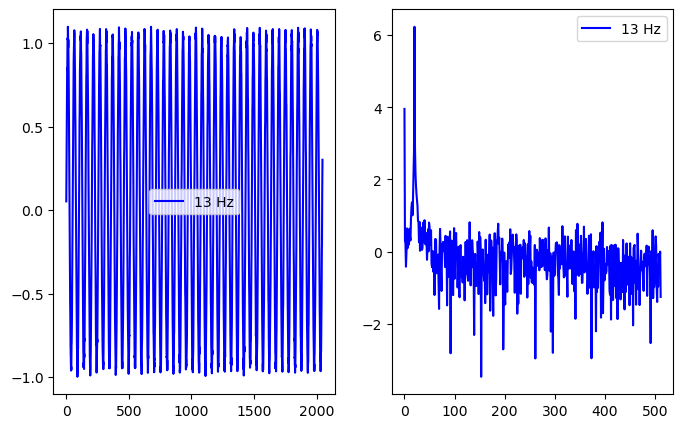

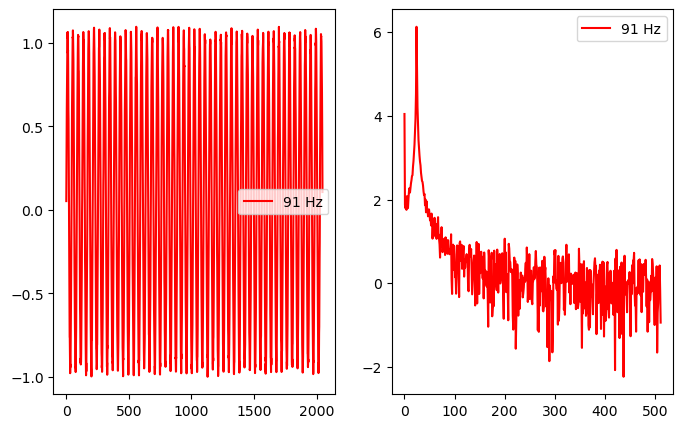

In [4]:
wg = WaveGenerator()

two_pi = 2*np.pi
time_serie_1 = wg.generate_time_series(frequency=two_pi*313)
time_serie_2 = wg.generate_time_series(frequency=two_pi*379)

wg.plot_wave(time_serie_1, label_hz='13 Hz')
wg.plot_wave(time_serie_2, label_hz='91 Hz', color='r')


#### Plot function

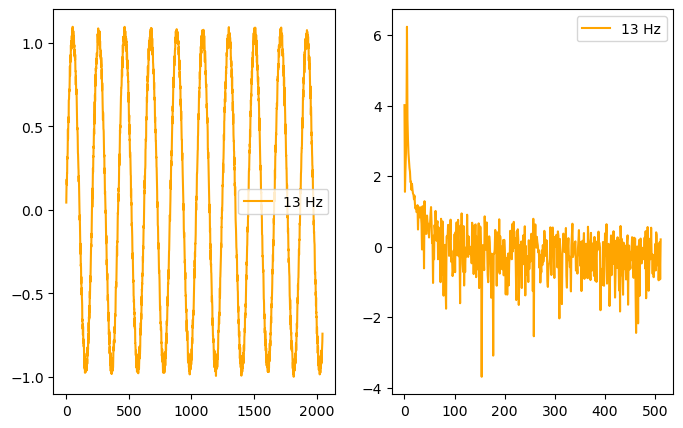

In [5]:
t = np.linspace(0, 10, 160000)
s1 = np.sin(2*np.pi*77*t) + 0.1*np.random.rand(len(t))

wg = WaveGenerator()
wg.plot_wave(serie=s1, color='orange', label_hz='13 Hz')


#### Generate .wav file


In [25]:
wg = WaveGenerator()
toy_serie = np.sin(2*np.pi*256*t) + 0.1*np.random.rand(len(t))
wg.generate_wav_file(file_name = 'toy', serie = toy_serie , sampling_rate = 16000)